In [40]:
%config InlineBackend.figure_format = 'retina'

In [67]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection, linear_model, metrics
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report

In [2]:
samples = pd.read_excel(u'20.01.23 список образцов Моча.xlsx', header=2)
samples.dropna(subset=['Gender'], inplace=True)

samples.fillna(0, inplace=True)
samples.reset_index(drop=True, inplace=True)

In [55]:
spectra1 = pd.read_csv('urine_chm001-250.csv')
spectra2 = pd.read_csv('urine_chm251-500.csv')
spectra_init = pd.concat([spectra1, spectra2],  ignore_index=True)

spectra = spectra_init.filter(regex='^Ch')

mmscaler = MinMaxScaler()
spectra = pd.DataFrame(mmscaler.fit_transform(spectra.T).T)

In [56]:
# pca = PCA(n_components=6)
# spectra_PCA = pd.DataFrame(pca.fit_transform(spectra))
# spectra_PCA['Dataset'] = spectra_init['Dataset']

# spectra_PCA = pd.merge(left=spectra_PCA, right=frame_lol, how='left', on='Dataset')
# spectra_PCA.dropna(subset=['TOTAL_a'], inplace=True)

In [57]:
frame_lol = samples[['Dataset', 'TOTAL_a']]

spectra['Dataset'] = spectra_init['Dataset']
spectra = pd.merge(left=spectra, right=frame_lol, how='left', on='Dataset')
spectra.dropna(subset=['TOTAL_a'], inplace=True)


In [58]:
spectra['TOTAL_a'].value_counts()

0.0     2037
1.0      890
2.0      500
3.0      350
4.0      183
5.0      111
7.0       70
6.0       57
8.0       30
11.0      10
10.0       9
14.0       4
Name: TOTAL_a, dtype: int64

In [59]:
from seaborn import barplot

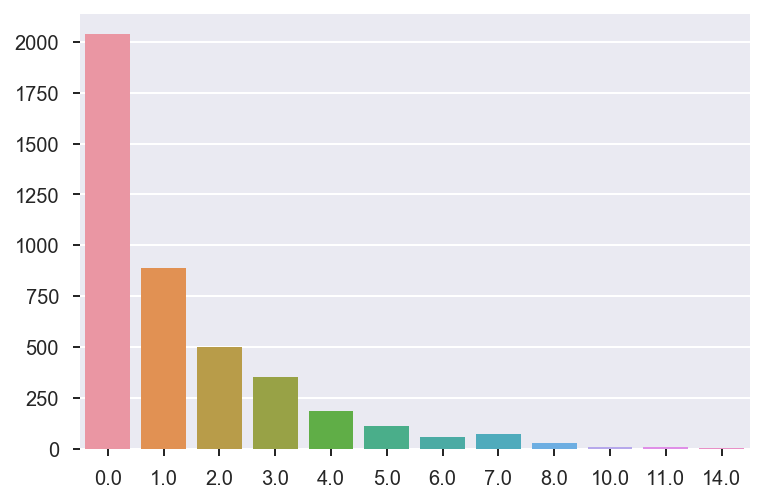

In [60]:
df = spectra['TOTAL_a'].value_counts()
barplot(df.index, df.values)

In [61]:
spectra

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,Dataset,TOTAL_a
0,0.009548,0.006474,0.049685,0.202149,0.123593,0.387389,0.041195,0.104526,0.142864,0.021804,...,0.074371,0.075371,0.041148,0.060607,0.009314,0.018939,0.008189,0.012748,Chm1,8.0
1,0.008944,0.006740,0.049408,0.213435,0.125622,0.417335,0.040500,0.107062,0.146123,0.023081,...,0.074040,0.071008,0.040300,0.061966,0.009789,0.019652,0.008480,0.013700,Chm1,8.0
2,0.007399,0.005264,0.044529,0.188678,0.115589,0.379931,0.036340,0.098683,0.138609,0.021477,...,0.070242,0.069050,0.036341,0.059691,0.008832,0.019432,0.007714,0.010939,Chm1,8.0
3,0.008285,0.005911,0.048244,0.200886,0.123995,0.399413,0.038485,0.102645,0.144699,0.022199,...,0.072781,0.069820,0.038771,0.060423,0.009440,0.019763,0.008134,0.013665,Chm1,8.0
4,0.007441,0.005255,0.044043,0.185445,0.113481,0.372787,0.036393,0.096989,0.136853,0.021068,...,0.070491,0.069071,0.036398,0.052239,0.008726,0.019684,0.007567,0.010917,Chm1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,0.011690,0.009324,0.068256,0.311768,0.175930,0.650618,0.048589,0.123997,0.158752,0.025448,...,0.075448,0.069925,0.043486,0.063455,0.009789,0.019200,0.008056,0.012671,Chm500,5.0
4870,0.011664,0.009292,0.068482,0.312936,0.176323,0.655573,0.048768,0.123926,0.159101,0.025267,...,0.075288,0.071531,0.043415,0.058873,0.009759,0.021257,0.008021,0.011546,Chm500,5.0
4871,0.011725,0.009244,0.068675,0.309914,0.176345,0.651669,0.048845,0.124147,0.159036,0.025429,...,0.075476,0.070926,0.043489,0.065800,0.009745,0.019847,0.008080,0.010946,Chm500,5.0
4872,0.011847,0.009256,0.068976,0.310944,0.176901,0.650243,0.049016,0.124191,0.159807,0.025461,...,0.075471,0.074381,0.043671,0.061440,0.009757,0.018765,0.008091,0.012283,Chm500,5.0


In [62]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(spectra.iloc[:,0:36],
                            spectra['TOTAL_a'], test_size = 0.3, random_state = 1)
train_labels

154     0.0
1064    3.0
473     1.0
4184    0.0
359     0.0
       ... 
3518    0.0
3386    3.0
918     2.0
4603    0.0
238     0.0
Name: TOTAL_a, Length: 2975, dtype: float64

In [63]:
lasso_model = linear_model.LassoCV(cv=5)
lasso_model.fit(train_data, train_labels)

/opt/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2654882042688769, tolerance: 0.9681731092436985
  positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [64]:
lasso_model.predict(test_data)

array([0.77379421, 0.02770775, 0.3255362 , ..., 1.10405046, 1.18391748,
       0.44735228])

In [65]:
test_labels

4052    0.0
1820    0.0
222     0.0
4563    1.0
3618    0.0
       ... 
1605    0.0
1077    0.0
2188    0.0
3703    1.0
1911    0.0
Name: TOTAL_a, Length: 1276, dtype: float64

In [66]:
lasso_model.score(test_data, test_labels) #R^2

0.5240850226217043

In [49]:
lasso_model.coef_

array([  -0.        ,   -0.        ,   -0.        ,    2.56188998,
          3.50587061,   -0.99005496,   -0.        ,    4.74424009,
        -22.21639938,    0.        ,   -0.        ,    0.        ,
         13.0967487 ,    0.        ,  -18.93210776,    0.        ,
          0.        ,   -0.        ,   27.01544041,    0.        ,
          0.4103963 ,   -0.        ,  -31.351836  ,    0.        ,
        247.27594541,  -87.8619762 , -163.1270843 ,   11.62851993,
        112.90930004,   -0.        ,   -0.        ,    5.30404136,
          0.        ,   43.9779968 ,    0.        ,   26.73629787])

In [81]:
lasso_model.coef_

array([  -0.        ,   -0.        ,   -0.        ,    2.56188998,
          3.50587061,   -0.99005496,   -0.        ,    4.74424009,
        -22.21639938,    0.        ,   -0.        ,    0.        ,
         13.0967487 ,    0.        ,  -18.93210776,    0.        ,
          0.        ,   -0.        ,   27.01544041,    0.        ,
          0.4103963 ,   -0.        ,  -31.351836  ,    0.        ,
        247.27594541,  -87.8619762 , -163.1270843 ,   11.62851993,
        112.90930004,   -0.        ,   -0.        ,    5.30404136,
          0.        ,   43.9779968 ,    0.        ,   26.73629787])

In [68]:
preds = lasso_model.predict(test_data).round(0)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.77      0.37      0.50       606
         1.0       0.26      0.63      0.37       267
         2.0       0.26      0.29      0.27       142
         3.0       0.21      0.24      0.22        91
         4.0       0.11      0.04      0.06        70
         5.0       0.04      0.03      0.03        39
         6.0       0.29      0.11      0.15        19
         7.0       0.38      0.16      0.22        19
         8.0       1.00      0.25      0.40        12
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         4
        11.0       0.00      0.00      0.00         5
        14.0       0.00      0.00      0.00         2

    accuracy                           0.37      1276
   macro avg       0.22      0.14      0.15      1276
weighted avg       0.49   

/opt/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [69]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [70]:
pd.DataFrame(zip(ridge_model.predict(test_data), test_labels)).head(20)

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
5,3.0,1.0
6,0.0,0.0
7,0.0,0.0
8,3.0,2.0
9,0.0,0.0


In [71]:
ridge_model.score(test_data, test_labels) #accuracy

0.48589341692789967

In [72]:
ridge_model.coef_

array([[-2.98560820e-01, -5.83622303e-02, -2.53357753e-01,
         2.79069836e-01,  1.11895402e+00, -1.83608397e+00,
        -1.91862211e-01,  1.71638337e+00,  8.90712463e-01,
         3.18107681e-01,  1.54735117e+00,  4.18938323e-03,
         2.19807399e+00,  2.14932050e-02,  1.39180810e+00,
        -1.09120252e-02,  9.70428462e-16,  3.02385059e-02,
        -4.78554508e+00,  1.59420953e-03, -4.78393794e+00,
         7.79552757e-02, -5.85321820e-01, -2.58424177e-01,
        -1.23288938e+00,  1.14685428e-01, -5.47538899e-01,
        -3.44831841e-01, -7.17794280e-01, -6.32357102e-01,
        -2.93441390e-01, -8.73792916e-01, -1.13782285e-01,
        -7.03812106e-01, -7.39154786e-02, -3.46533187e-01],
       [ 1.34794374e-01,  9.26313810e-02,  4.26724604e-01,
         1.18015031e+00,  3.28780050e-01, -1.04783621e+00,
        -5.80559375e-02, -8.82769450e-01, -2.60785894e-01,
        -2.33344181e-01,  8.26491943e-01, -3.98763405e-02,
        -3.90709320e-01, -3.34860637e-02,  2.31409954e-

In [73]:
preds = ridge_model.predict(test_data)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

         0.0       0.52      1.00      0.68       606
         1.0       0.00      0.00      0.00       267
         2.0       0.07      0.02      0.03       142
         3.0       0.21      0.11      0.14        91
         4.0       0.00      0.00      0.00        70
         5.0       0.00      0.00      0.00        39
         6.0       0.00      0.00      0.00        19
         7.0       0.33      0.11      0.16        19
         8.0       0.00      0.00      0.00        12
        10.0       0.00      0.00      0.00         4
        11.0       0.00      0.00      0.00         5
        14.0       0.00      0.00      0.00         2

    accuracy                           0.49      1276
   macro avg       0.09      0.10      0.08      1276
weighted avg       0.27      0.49      0.34      1276



/opt/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
svm_class_model = LinearSVC(penalty='l2',  multi_class='ovr', max_iter=2000) 
svm_class_model.fit(train_data, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=2000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [75]:
svm_class_model.score(test_data, test_labels) #accuracy

0.4835423197492163

In [53]:
svm_class_model.coef_

array([[-3.81051609e-01, -4.26328523e-02, -3.62258717e-01,
        -1.86955202e-01,  1.27604128e+00, -1.89518216e+00,
        -2.34199804e-01,  2.59848252e+00,  1.02981338e+00,
         4.97044264e-01,  1.17821608e+00, -3.00262180e-03,
         1.39460292e+00,  4.17144000e-02,  3.53365600e+00,
        -2.46528566e-02, -2.81378825e-01, -9.58156324e-03,
        -6.83896306e+00, -1.32592488e-03, -7.75890363e+00,
         6.58793893e-02,  9.02139619e-02, -2.69745878e-01,
        -2.24661629e+00, -2.08117284e-01, -8.57714518e-01,
        -8.80110828e-01, -1.06564141e+00, -1.68662732e+00,
        -4.16705023e-01, -1.96198693e+00, -1.05390108e-01,
        -9.59468035e-01, -7.78518926e-02, -4.28699287e-01],
       [ 2.87085311e-01,  1.51104398e-01,  6.99167908e-01,
         1.49195833e+00,  3.55153207e-01, -1.18139989e+00,
        -1.27301524e-02, -1.66389147e+00, -4.77111163e-01,
        -4.36125163e-01,  1.25634702e+00, -7.36580911e-02,
        -7.85413412e-01, -6.23685036e-02,  2.81288457e-

In [77]:
preds = svm_class_model.predict(test_data)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

         0.0       0.54      0.99      0.70       606
         1.0       0.00      0.00      0.00       267
         2.0       0.05      0.01      0.02       142
         3.0       0.13      0.10      0.11        91
         4.0       0.00      0.00      0.00        70
         5.0       0.00      0.00      0.00        39
         6.0       0.00      0.00      0.00        19
         7.0       0.33      0.21      0.26        19
         8.0       0.00      0.00      0.00        12
        10.0       0.00      0.00      0.00         4
        11.0       0.00      0.00      0.00         5
        14.0       0.00      0.00      0.00         2

    accuracy                           0.48      1276
   macro avg       0.09      0.11      0.09      1276
weighted avg       0.27      0.48      0.34      1276



/opt/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
